In [1]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare, chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing data from excel file
path_link = r"C:\Users\GAdmin\Desktop\srp\beam.xlsx"
Data_x = pd.read_excel(path_link)
Data_x = Data_x[['Distance from lens mm', 'beam radius mm', 'stddev mm']]

In [8]:
#standardising units
x_values = Data_x['Distance from lens mm'] * 10**-3 #m
y_values = Data_x['beam radius mm'] * 10**-6        #m
stddev = Data_x['stddev mm'] * 10**-6               #m
stddev

0     7.071068e-07
1     1.435270e-06
2     8.602325e-07
3     5.099020e-07
4     6.782330e-07
5     7.071068e-07
6     3.162278e-07
7     3.162278e-07
8     2.449490e-07
9     3.162278e-07
10    7.071068e-07
11    3.741657e-07
12    8.602325e-07
13    8.366600e-07
14    7.071068e-07
Name: stddev mm, dtype: float64

In [4]:
#curve fitting
wavelength = 532 * 10**-9 #m

def waist_func(z, w0, z0, Zrm):
    return w0 * np.sqrt(1 + (((z - z0) ** 2) / (Zrm**2)))

popt, pcov = curve_fit(waist_func, x_values, y_values, p0 = [0.0002, 0.6, 0.02])

print("Optimal parameters", popt)

w0, z0, Zrm = popt

unc_w0 = pcov[0,0]**0.5
unc_z0 = pcov[1,1]**0.5
unc_Zrm = pcov[2,2]**0.5

Optimal parameters [4.12957244e-05 5.70721953e-01 2.37402841e-02]


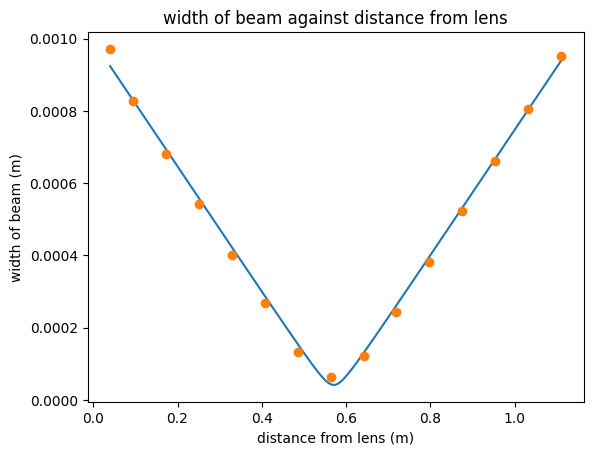

In [5]:
dx = np.linspace(0.03992, 1.10976, 10000)
y_fit = waist_func(dx, w0, z0, Zrm)

#plotting equation with fitted variables (X axis) 
plt.xlabel("distance from lens (m)")
plt.ylabel("width of beam (m)")
plt.title("width of beam against distance from lens")
plt.plot(dx, y_fit)
plt.errorbar(x_values, y_values, fmt = 'o',  yerr=stddev, capsize=3, ecolor = "black")
plt.show()

In [6]:
#Calculating parameters
def parameters(w0, Zrm):
    beam_divergence_angle = w0/Zrm
    unc_bda = (unc_w0 + unc_Zrm) * beam_divergence_angle
    m_squared_value = (np.pi*w0**2)/(wavelength*Zrm)
    unc_m2 = (2 * unc_w0 + unc_Zrm) * m_squared_value

    return beam_divergence_angle, m_squared_value, unc_bda, unc_m2

beam_divergence_angle, m_squared_value, unc_bda, unc_m2 = parameters(w0, Zrm)

print("waist: ", w0, "m +-", unc_w0)
print("rayleigh range: ", Zrm, "m +-", unc_Zrm / Zrm * 100)
print("beam divergence angle: ", beam_divergence_angle, "m +-", unc_bda)
print("M^2 value: ", m_squared_value, "m +-", unc_m2)

waist:  4.1295724436883e-05 m +- 1.9893413495473966e-05
rayleigh range:  0.023740284069200892 m +- 48.40544040644888
beam divergence angle:  0.0017394789513263409 m +- 2.0023981456752157e-05
M^2 value:  0.4241920329867886 m +- 0.004891517779551046


In [13]:
def chisq(obs, exp, error):
    return np.sum((obs - exp) ** 2 / (error ** 2))

obs = y_values
exp = waist_func(x_values, w0, z0, Zrm)
error = stddev

chi_sq = chisq(obs, exp, error)
reduced_chisq = chi_sq / (len(y_values)-1)
reduced_chisq

1587.2817568230182

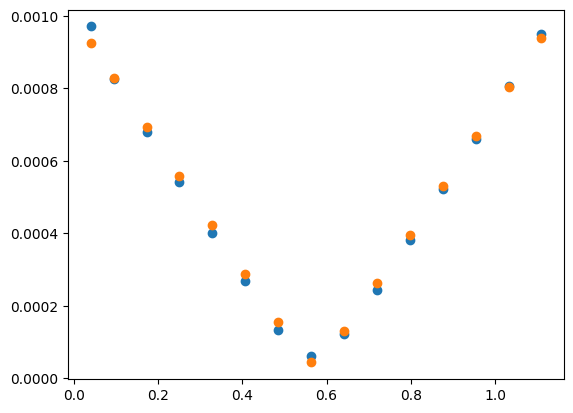

In [12]:
plt.scatter(x_values, y_values)
plt.scatter(x_values, exp)